C:\Users\User\AppData\Local\Temp\ipykernel_9376\699110258.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


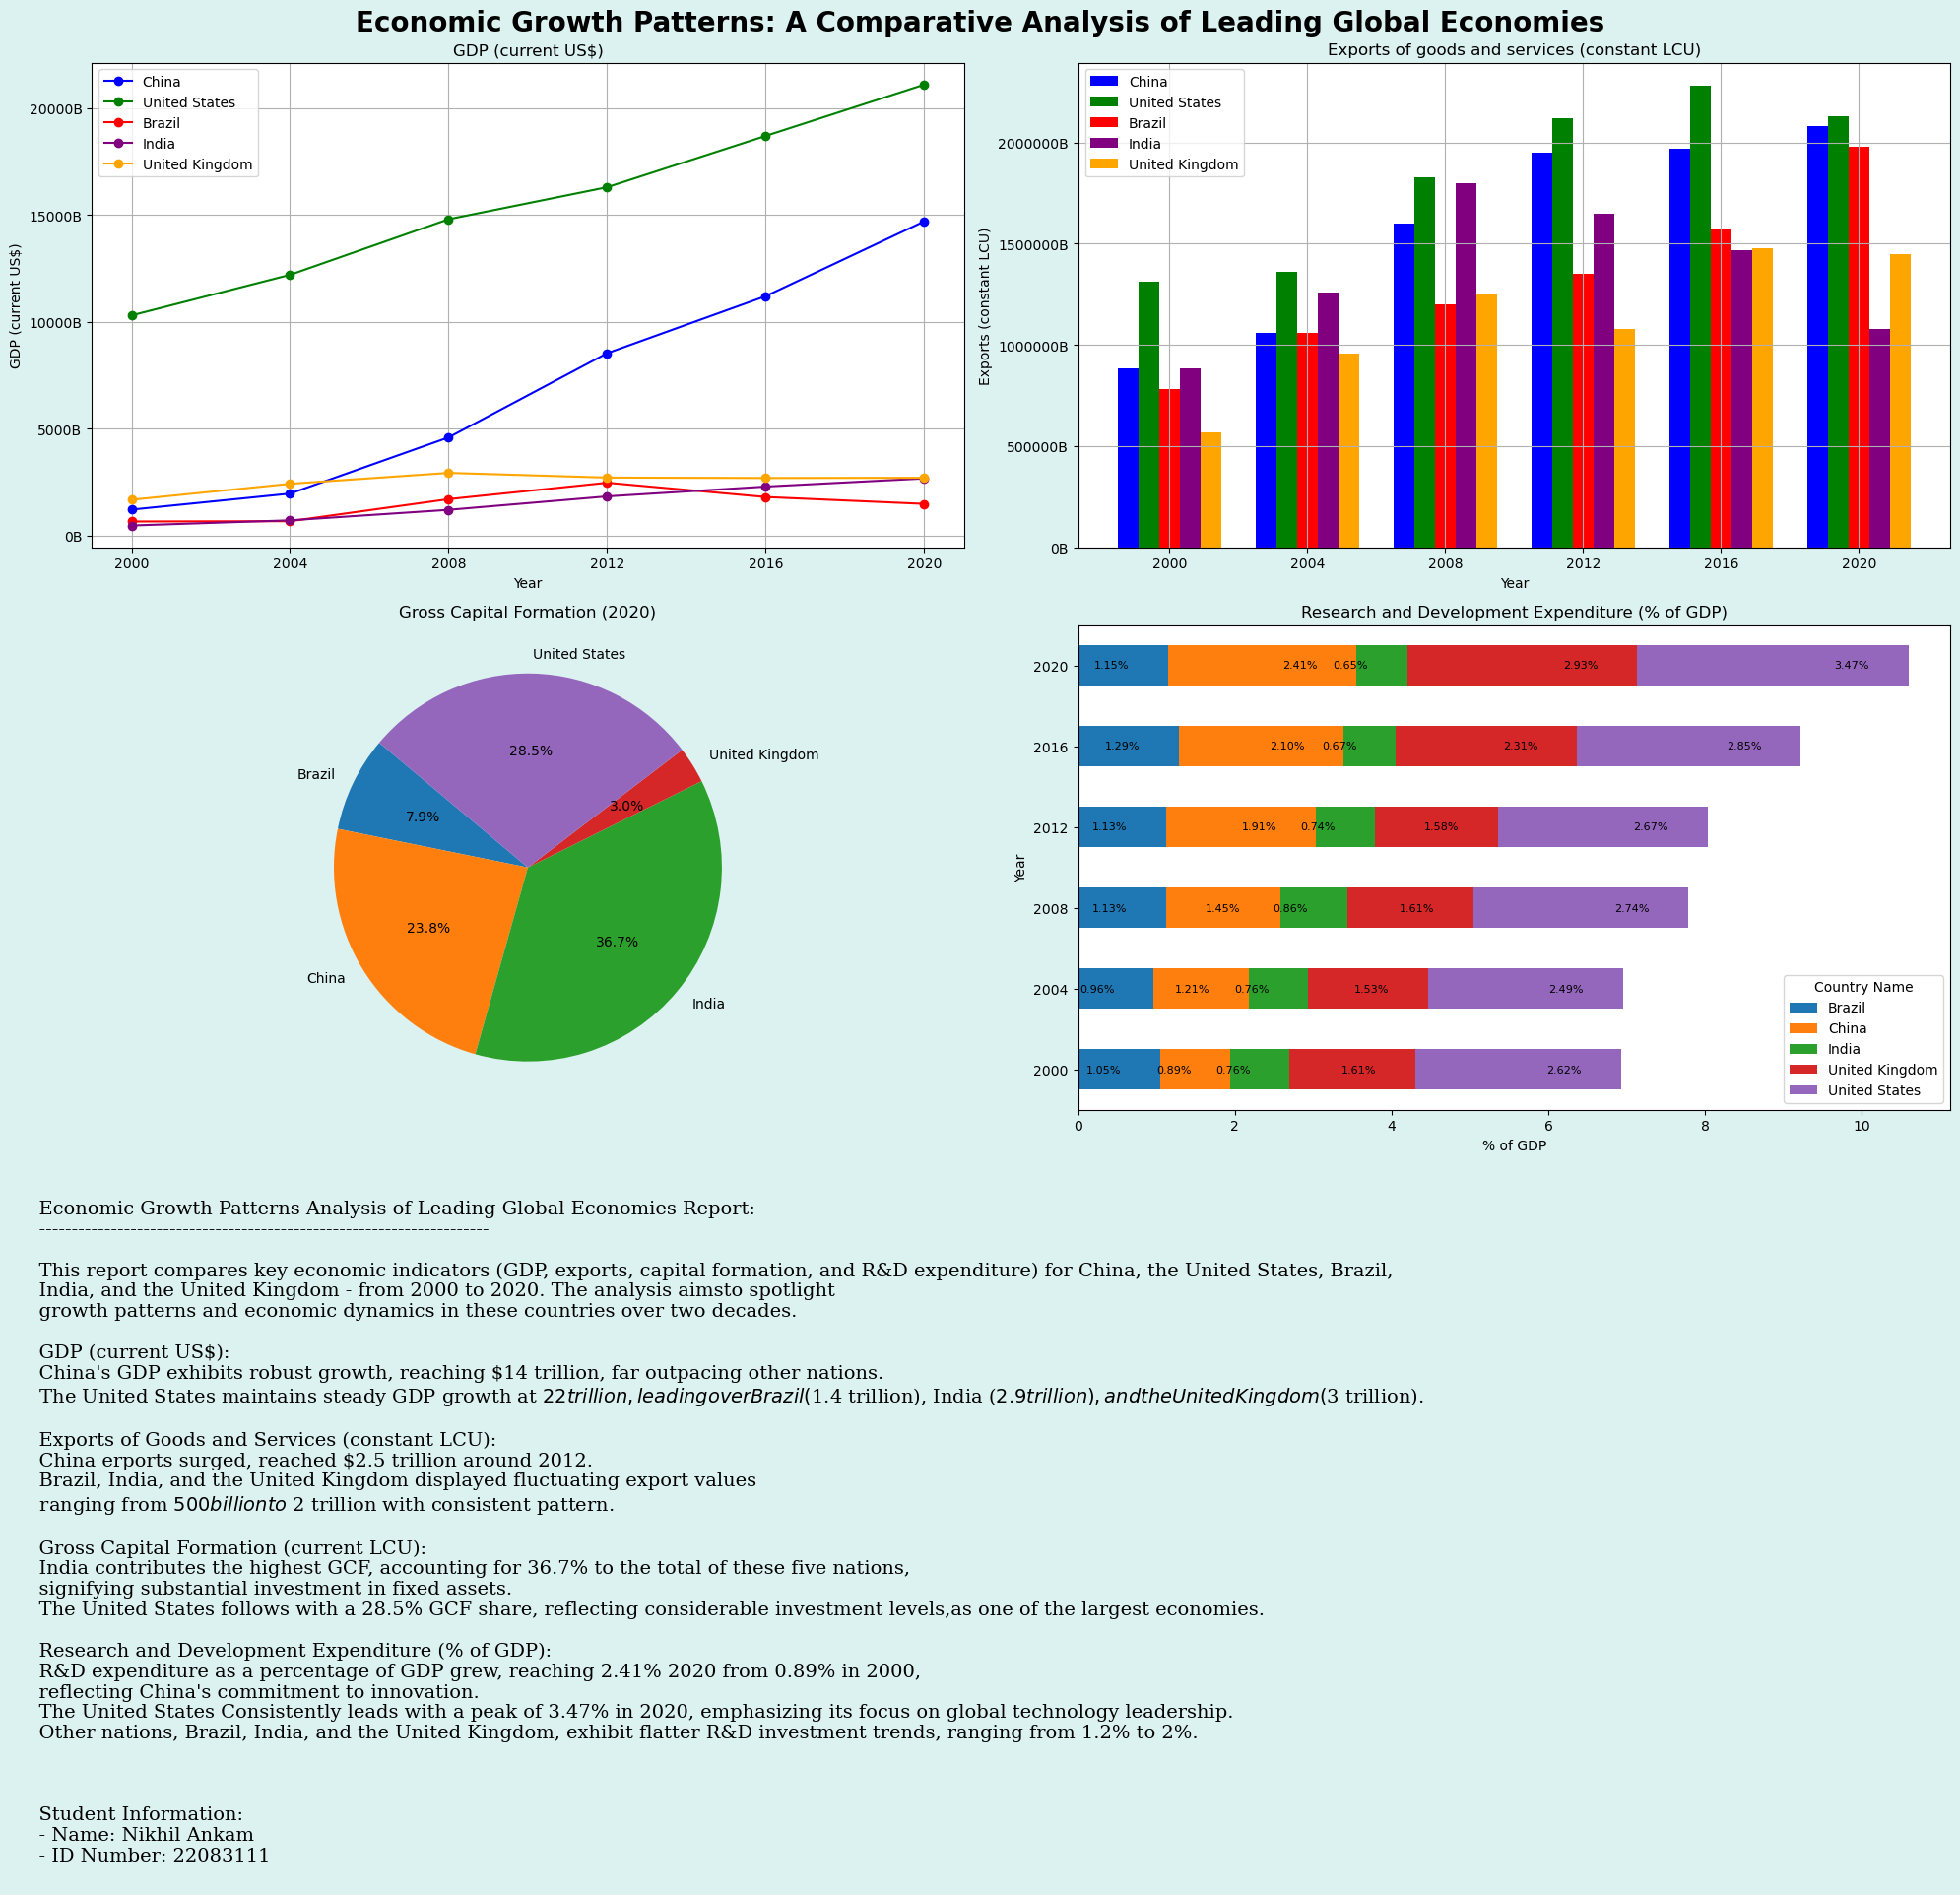

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

def filter_data(data, countries, series):
    """Filter data based on specified countries and series."""
    return data[data['Country Name'].isin(countries) & data['Series Name'].isin(series)]

def select_columns(data, columns):
    """Select specific columns from the data."""
    return data[columns]

def format_yaxis_billions(value, _):
    """Format y-axis labels in billions."""
    return f'{int(value / 1e9)}B'

def create_line_plot(ax, x_values, y_values, labels, title, x_label, y_label, colors):
    """Create a line plot."""
    for idx, label in enumerate(labels):
        ax.plot(x_values, y_values.loc[label].values, label=label, color=colors[idx], marker='o')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)
    ax.get_yaxis().set_major_formatter(FuncFormatter(format_yaxis_billions))

def create_bar_plot(ax, x_values, y_values, labels, title, x_label, y_label, colors):
    """Create a bar plot."""
    bar_width = 0.15
    x = np.arange(len(x_values))
    for idx, label in enumerate(labels):
        ax.bar(x + idx * bar_width, y_values.loc[label].values, width=bar_width, label=label, color=colors[idx])
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_xticks(x + bar_width * 2)
    ax.set_xticklabels(x_values)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True)
    ax.get_yaxis().set_major_formatter(FuncFormatter(format_yaxis_billions))

def create_pie_plot(ax, values, labels, title):
    """Create a pie plot."""
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

def create_stacked_bar_plot(ax, data, title, x_label, y_label):
    """Create a stacked horizontal bar plot."""
    data.set_index('Country Name').T.plot(kind='barh', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('% of GDP')
    ax.set_ylabel(x_label)

    # Improve the placement of % values
    for bar_container in ax.containers:
        for bar in bar_container:
            width = bar.get_width()
            label_x_position = bar.get_x() + width - 0.5  # Adjust position for label to be inside the bar
            label_y_position = bar.get_y() + bar.get_height() / 2
            value = f'{width:.2f}%'
            if width > 0.5:  # Only display label if the bar is wide enough
                ax.text(label_x_position, label_y_position, value, va='center', ha='right', color='black', fontsize=8)

def generate_report_text():
    """Generate a report text."""
    return """
    Economic Growth Patterns Analysis of Leading Global Economies Report:
    ---------------------------------------------------------------------
    
    This report compares key economic indicators (GDP, exports, capital formation, and R&D expenditure) for China, the United States, Brazil,
    India, and the United Kingdom - from 2000 to 2020. The analysis aimsto spotlight 
    growth patterns and economic dynamics in these countries over two decades.
    
    GDP (current US$):
    China's GDP exhibits robust growth, reaching $14 trillion, far outpacing other nations.
    The United States maintains steady GDP growth at $22 trillion, leading over Brazil ($1.4 trillion), India ($2.9 trillion), and the United Kingdom ($3 trillion).

    Exports of Goods and Services (constant LCU):
    China erports surged, reached $2.5 trillion around 2012.
    Brazil, India, and the United Kingdom displayed fluctuating export values 
    ranging from $ 500 billion to $ 2 trillion with consistent pattern.

    Gross Capital Formation (current LCU):
    India contributes the highest GCF, accounting for 36.7% to the total of these five nations,
    signifying substantial investment in fixed assets.
    The United States follows with a 28.5% GCF share, reflecting considerable investment levels,as one of the largest economies.

    Research and Development Expenditure (% of GDP):
    R&D expenditure as a percentage of GDP grew, reaching 2.41% 2020 from 0.89% in 2000,
    reflecting China's commitment to innovation.
    The United States Consistently leads with a peak of 3.47% in 2020, emphasizing its focus on global technology leadership. 
    Other nations, Brazil, India, and the United Kingdom, exhibit flatter R&D investment trends, ranging from 1.2% to 2%. 

    
    """

def add_student_information(report_text, student_name, student_id):
    """Add student information to the report."""
    return report_text + f"""
    Student Information:
    - Name: {student_name}
    - ID Number: {student_id}
    """

def main():
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    # Load the updated data from the file
    updated_file_path =  "data.csv"
    updated_data = load_data(updated_file_path)

    # Define the countries and years of interest
    countries_of_interest = ['China', 'United States', 'Brazil', 'India', 'United Kingdom']
    years_of_interest = ['2000', '2004', '2008', '2012', '2016', '2020']

    # Define the series of interest
    series_of_interest = ['GDP (current US$)', 'Research and development expenditure (% of GDP)', 'Exports of goods and services (constant LCU)', 'Gross capital formation (current LCU)']

    # Filter the updated data for the specific series and countries 
    filtered_updated_data = filter_data(updated_data, countries_of_interest, series_of_interest)

    # Pivot the data for easier plotting
    pivot_gdp_updated = filtered_updated_data[filtered_updated_data['Series Name'] == 'GDP (current US$)'].pivot(index='Country Name', columns='Series Name', values=years_of_interest)
    pivot_exports_updated = filtered_updated_data[filtered_updated_data['Series Name'] == 'Exports of goods and services (constant LCU)'].pivot(index='Country Name', columns='Series Name', values=years_of_interest)

    # Filtering data for Gross Capital Formation (current LCU) for the year 2020
    gross_capital_formation_2020 = select_columns(updated_data[(updated_data['Series Name'] == 'Gross capital formation (current LCU)') & (updated_data['Country Name'].isin(countries_of_interest))], ['Country Name', '2020'])

    # Filtering data for Research and Development Expenditure (% of GDP)
    research_development_expenditure = select_columns(updated_data[(updated_data['Series Name'] == 'Research and development expenditure (% of GDP)') & (updated_data['Country Name'].isin(countries_of_interest))], ['Country Name'] + years_of_interest)

    # Create a figure with a specified background color
    fig = plt.figure(figsize=(20, 12), facecolor='#DCF2F1')  # Set the background color

    # Create subplots
    axs = fig.subplots(2, 2)

    # Create plots
    create_line_plot(axs[0, 0], years_of_interest, pivot_gdp_updated, countries_of_interest, 'GDP (current US$)', 'Year', 'GDP (current US$)', colors)
    create_bar_plot(axs[0, 1], years_of_interest, pivot_exports_updated, countries_of_interest, 'Exports of goods and services (constant LCU)', 'Year', 'Exports (constant LCU)', colors)
    create_pie_plot(axs[1, 0], gross_capital_formation_2020['2020'], gross_capital_formation_2020['Country Name'], 'Gross Capital Formation (2020)')
    create_stacked_bar_plot(axs[1, 1], research_development_expenditure, 'Research and Development Expenditure (% of GDP)', 'Year', '% of GDP')

    # Report text and author information
    report_text = generate_report_text()
    student_name = "Nikhil Ankam"
    student_id = "22083111"
    report_text_with_student_info = add_student_information(report_text, student_name, student_id)

    # Add the information to the bottom of the plot
    fig.text(0.01, -0.01, report_text_with_student_info, fontsize=14, ha='left', va='top', fontfamily='serif', color='black')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle("Economic Growth Patterns: A Comparative Analysis of Leading Global Economies", fontsize=20, weight='bold')

    # Adjust layout and show the plots
    plt.tight_layout()    

if __name__ == "__main__":
    main()
plt.show()